# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

**Выполнил Царев Иван, Б05-106**

## 1. Данные (2 балла)

Скачиваем данные для работы:

Начнем с необходимых приготовлений.

In [223]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [224]:
coins = pd.read_csv("coins.csv")

Посмотрим что получилось

In [225]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [226]:
tmp = coins.groupby(by="symbol").mean()

In [227]:
tmp.shape[0]

66

### 2. За какой период данные мы имеем? (0.4 балла)

In [228]:
min(coins["date"])

'2013-04-28'

In [229]:
max(coins["date"])

'2018-06-06'

**Ответ:** период с 2013-04-28 по 2018-06-06

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

Всего пропусков:

In [230]:
coins.isnull().sum().sum()

5197

Пропуски по колонкам:

In [231]:
coins.isnull().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

Возможно в этих столбцах есть пробелы, так как это не самые важные данные в data frame, так как гораздо важнее сохранить самую низкую и высокую цену данной монеты в течение данного торгового дня, цену открытия/закрытия и т.д. Поэтому в первую очередь сохраняются самые важные данные, а менее важные иногда пропускаются

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

Найдем индекс монеты с максимальной ценой:

In [232]:
np.where(coins["high"] == max(coins["high"]))[0][0]

25971

Выведем название монеты и дату этого события:

In [233]:
coins.loc[25971]["name"]

'Bitcoin'

In [234]:
coins.loc[25971]["date"]

'2017-12-17'

### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

In [235]:
r = coins.groupby(by="symbol").mean()
r = r.reset_index()
r = r.sort_values(by="market", ascending=False)
r = r[["symbol", "market"]]

In [236]:
h = r.iloc[5 : r.shape[0]]

In [237]:
r = r.head(5)

In [238]:
r = r.append({"symbol" : "Другие", "market": h["market"].sum()}, ignore_index=True)
r = r.set_index("symbol")

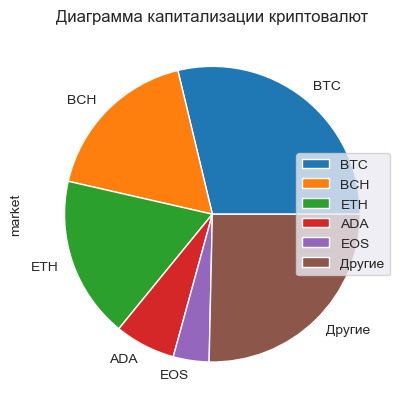

In [239]:
r.plot(kind="pie", y="market")
plt.title("Диаграмма капитализации криптовалют")
plt.legend(loc="right")
None

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [240]:
from mplfinance.original_flavor import candlestick_ohlc

In [241]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coins_tmp = coins[coins["symbol"] == symbol]
    coins_tmp = coins_tmp[coins_tmp["date"] >= start_date]
    coins_tmp = coins_tmp[coins_tmp["date"] <= end_date]
    
    ohlc = coins_tmp.loc[:, ['date', 'open', 'high', 'low', 'close']]
    ohlc['date'] = pd.to_datetime(ohlc['date'])
    ohlc['date'] = ohlc['date'].apply(mpl.dates.date2num)
    ohlc = ohlc.astype(float)
    fig, ax = plt.subplots()
    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)


    ax.set_xlabel('date')
    ax.set_ylabel('price')
    fig.suptitle('Price chart of VERI')

    date_format = mpl.dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    
    fig.tight_layout()

Посмотрим, что получилось:

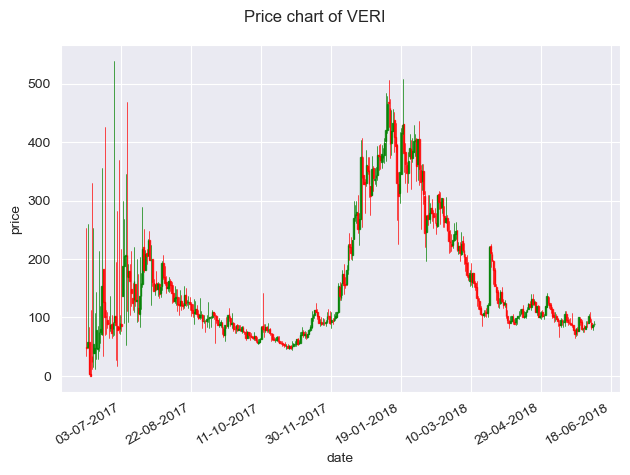

In [242]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [243]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    coins_tmp = coins[coins["symbol"] == symbol]
    coins_tmp = coins_tmp[coins_tmp["date"] >= start_date]
    coins_tmp = coins_tmp[coins_tmp["date"] <= end_date]
    
    tmp = coins_tmp.apply(lambda x: (x.high / max(x.close, x.open)), axis=1)
    return max(tmp)

In [244]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

1.1428940004366206

Сравните эти значения для разных монет:

In [245]:
table = coins.groupby(by="symbol").mean().reset_index()
table["pnd"] = table.apply(lambda x: find_most_severe_pump_and_dump(coins, symbol=x.symbol, start_date='2017-06-01', end_date='2018-06-01'), axis=1)

In [246]:
table = table.sort_values(by="pnd", ascending=False)
table = table[['symbol', 'pnd']]
table

,symbol,pnd
56,VERI,33.549254
24,FUN,12.490562
53,TRX,9.651010
9,BTM,7.177933
8,BTG,5.777033
...,...,...
7,BTC,1.142894
11,CTXC,1.142857
60,XEM,1.135870
35,LTC,1.108226


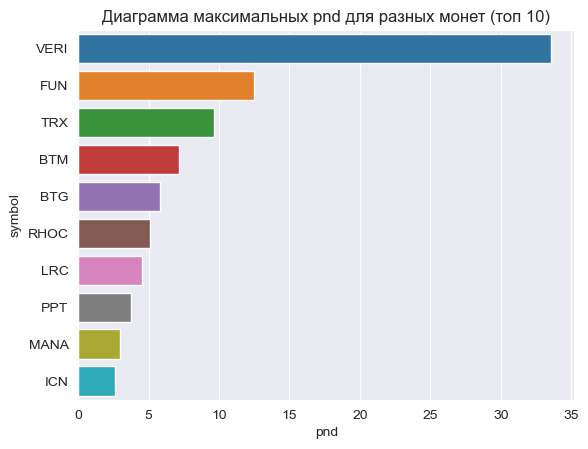

In [247]:
sns.barplot(data=table[0:10], x="pnd", y="symbol")
plt.title("Диаграмма максимальных pnd для разных монет (топ 10)")
None

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [248]:
def compute_roi(coins, investments, start_date, end_date):
    ans_1 = 0
    ans_2 = 0
    for i in investments.items():
        ans_1 += i[1]
    for i in investments.items():
        count_act = i[1] / coins.loc[(coins["symbol"] == i[0]) & (coins["date"] == start_date)]["price"].iloc[0]
        ans_2 += (coins.loc[(coins["symbol"] == i[0]) & (coins["date"] == end_date)]["price"].iloc[0]) * count_act
    return (ans_2 - ans_1) / ans_1

In [249]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [250]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [251]:
def plot_bollinger_bands(coins, symbol, window, width):
    coins_tmp = coins[coins["symbol"] == symbol].copy()
    coins_tmp["mean"] = coins_tmp["price"].rolling(window).mean()
    coins_tmp["var"] = coins_tmp["price"].rolling(window).var()
    coins_tmp["func_up"] = coins_tmp.apply(lambda x: x["mean"] + width * np.sqrt(x["var"]), axis=1)
    coins_tmp["func_down"] = coins_tmp.apply(lambda x: x["mean"] - width * np.sqrt(x["var"]), axis=1)
    plt.plot(coins_tmp["date"], coins_tmp["price"], color='red')
    plt.plot(coins_tmp["date"], coins_tmp["func_up"])
    plt.plot(coins_tmp["date"], coins_tmp["func_down"])
    plt.legend(['график цены', 'верхняя граница Боллинджера', 'нижняя граница Боллинджера'])
    plt.title(f"График цены криптомонеты {symbol}")
    plt.xlabel("Дата")
    plt.ylabel(f"Цена монеты {symbol}")
    plt.xticks([])

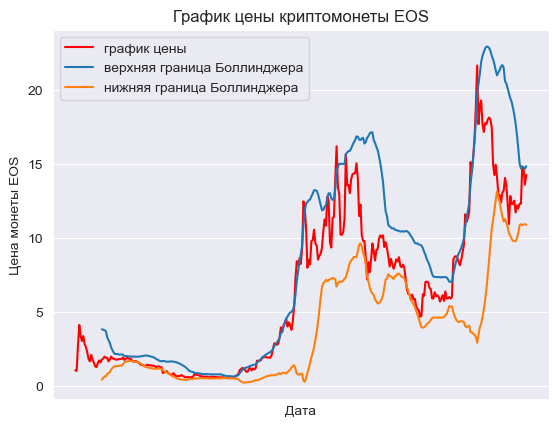

In [252]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Из графика видно, что правило Боллинджера практически выполняется.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [253]:
def plot_coins_capitalizations(coins, symbols, start_date):
    coins_tmp = coins[coins["date"] >= start_date]
    r = coins_tmp.groupby(by="symbol").mean()
    r = r.reset_index()
    r = r.sort_values(by="market", ascending=False)
    r = r[["symbol", "market"]]
    cap_all = r.sum()["market"]
    r = r.loc[r["symbol"].isin(symbols)]
    
    cap_part = r.copy()
    cap_part["market"] = cap_part["market"] / cap_all
    cap_part = cap_part.append({"symbol" : "Полная", "market": 1}, ignore_index=True)
    cap_part = cap_part.sort_values(by="market", ascending=False)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.barplot(ax=axes[0], data=r, x="market", y="symbol")
    axes[0].set_xlabel("capitalization")
    axes[0].set_title("Диаграмма капитализации некоторых монет")

    sns.barplot(ax=axes[1], data=cap_part, x="market", y="symbol")
    axes[1].set_xlabel("part of the total capitalization")
    axes[1].set_title("Доля капитализации на рынке для некоторых монет ")

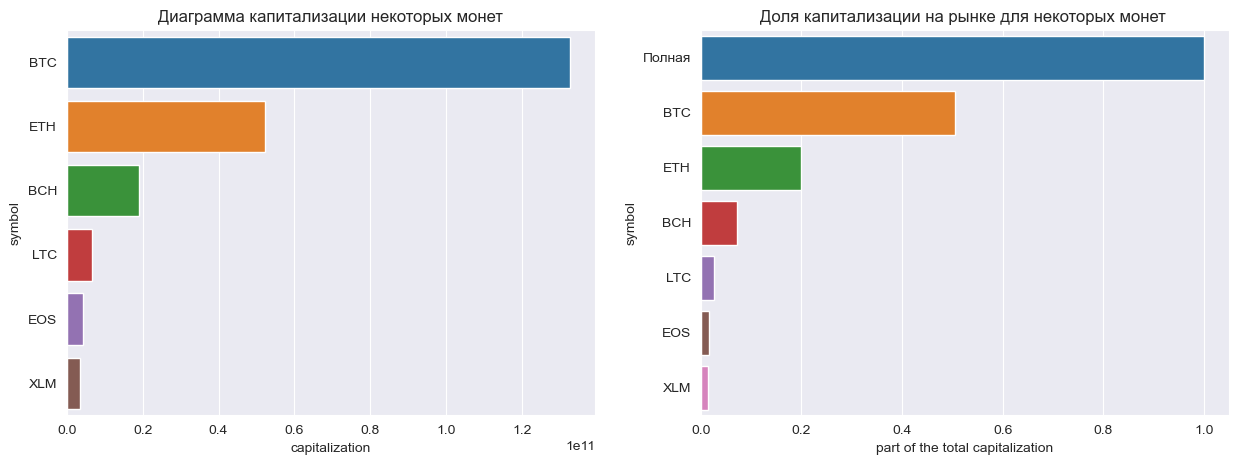

In [254]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ответ:**

Биткоин имеет капитализацию в половину от общей капитализации рынка криптовалют, это колоссальная доля. В первую очередь причина этому - преимущество первопроходца. Так как биткоин был первой известной криптовалютой, он стал самой популярной, а значит и капитализация его выше, чем у других криптовалют. По этой же причине биткоин имеет самую большую и самую активную пользовательскую базу среди всех криптовалют

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [255]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    coins_tmp = coins[coins["symbol"].isin(symbols)]
    coins_tmp = coins_tmp[coins_tmp["date"] <= date]
    coins_tmp["price_sym_mean"] = 0
    for symbol in symbols:
        coins_tmp["price_sym_mean"][coins_tmp["symbol"] == symbol] = coins_tmp["price"][coins_tmp["symbol"] == symbol].rolling(window).mean()
    pv_table = coins_tmp.pivot_table(values="price_sym_mean", columns="symbol", index="date").corr()
    return pv_table

In [256]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.00,0.80,0.68,0.68,0.93,0.81,0.91
BCH,0.80,1.00,0.94,0.65,0.78,0.88,0.72
BTC,0.68,0.94,1.00,0.63,0.93,0.97,0.85
EOS,0.68,0.65,0.63,1.00,0.82,0.74,0.91
ETH,0.93,0.78,0.93,0.82,1.00,0.95,0.94
LTC,0.81,0.88,0.97,0.74,0.95,1.00,0.91
XLM,0.91,0.72,0.85,0.91,0.94,0.91,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [257]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.00,0.81,0.94,0.98,0.96,1.00,0.99
BCH,0.81,1.00,0.93,0.90,0.93,0.85,0.89
BTC,0.94,0.93,1.00,0.80,0.91,0.95,0.90
EOS,0.98,0.90,0.80,1.00,0.81,0.91,0.94
ETH,0.96,0.93,0.91,0.81,1.00,0.92,0.81
LTC,1.00,0.85,0.95,0.91,0.92,1.00,0.93
XLM,0.99,0.89,0.90,0.94,0.81,0.93,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

In [258]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol]
    coin = coin[coin["date"] > start_date]
    coin = coin[coin["date"] < end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

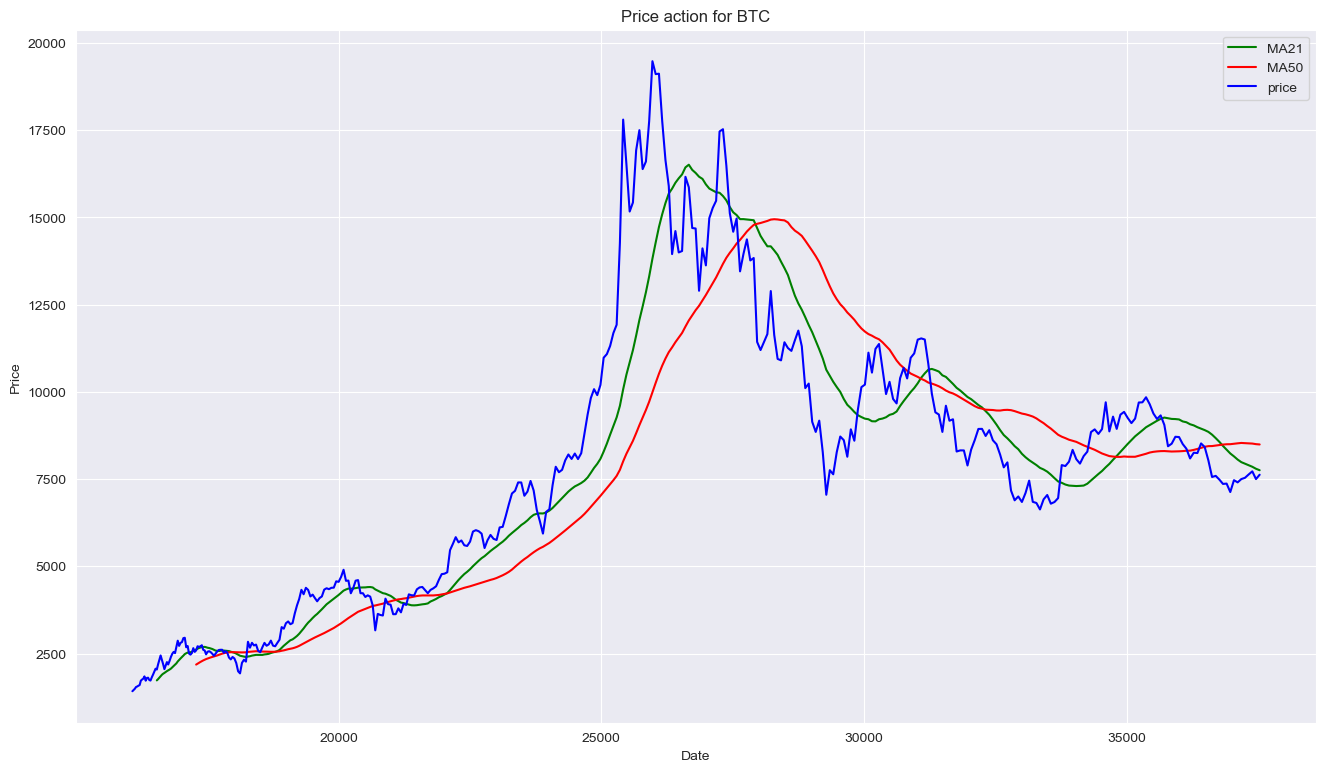

In [259]:
plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [260]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

IndentationError: expected an indented block (2276659314.py, line 4)

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.